In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import những thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Trích xuất đặc trưng
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import pearsonr
# Chuẩn bị dữ liệu
from sklearn.preprocessing import LabelEncoder
# Xây dựng mô hình
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [3]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('../data/cleaned_dataset.csv')
# df = pd.read_csv('/content/drive/MyDrive/HCMUS/HK5/Intro2DS/Final Project/data/cleaned_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5064 entries, 0 to 5063
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Khu vực tuyển         5064 non-null   object 
 1   Thời gian thử việc    5064 non-null   float64
 2   Cấp bậc               5064 non-null   object 
 3   Yêu cầu giới tính     5064 non-null   object 
 4   Số lượng tuyển        5064 non-null   int64  
 5   Hình thức làm việc    5064 non-null   object 
 6   Yêu cầu bằng cấp      5064 non-null   object 
 7   Yêu cầu kinh nghiệm   5064 non-null   object 
 8   Ngành nghề            5064 non-null   object 
 9   Quy mô công ty        5064 non-null   object 
 10  Loại công ty          5064 non-null   object 
 11  Mức lương thấp nhất   5064 non-null   float64
 12  Mức lương cao nhất    5064 non-null   float64
 13  Mức lương trung bình  5064 non-null   float64
 14  Tuổi thấp nhất        5064 non-null   float64
 15  Tuổi cao nhất        

In [4]:
df[25:30]

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
25,Bình Dương,1.0,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Cao đẳng,Dưới 1 năm,Sản xuất - Lắp ráp - Chế biến/Hành chính - Thư...,150 - 300 người,Công ty trách nhiệm hữu hạn,10.0,15.0,12.5,23.0,36.0,29.5
26,TP.HCM,2.0,Chuyên viên- nhân viên,Nữ,2,Toàn thời gian cố định,Đại học,Chưa có kinh nghiệm,Hành chính - Thư ký/Tài chính - Đầu tư - Chứng...,Dưới 10 người,Công ty trách nhiệm hữu hạn,8.0,12.0,10.0,24.0,34.0,29.0
27,"Khánh Hòa, Đắk Nông, Kon Tum, Gia Lai, Quảng N...",1.6,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,Vận Tải - Lái xe - Giao nhận/Lao động phổ thôn...,150 - 300 người,Công ty trách nhiệm hữu hạn,8.0,15.0,11.5,23.0,35.0,29.0
28,Đồng Nai,2.0,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Cao đẳng,2 năm,Hành chính - Thư ký/Nhân sự,150 - 300 người,Công ty trách nhiệm hữu hạn,13.0,16.0,14.5,23.0,37.0,30.0
29,TP.HCM,1.8,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Trung cấp,1 năm,Biên phiên dịch/Hành chính - Thư ký/Thông tin ...,10 - 150 người,Công ty trách nhiệm hữu hạn,15.0,18.0,16.5,25.0,34.0,29.5


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>1. Tiền xử lý dữ liệu  </b></font>

<font color="red"><b>Câu hỏi: </b></font> <font color="red">Tại sao phải tiền xử lý dữ liệu ? Và tiền xử lý như thế nào?</font>

<font color="red"><b>Trả lời :</b></font> <font color="red">Giải thích </font>

</div>

- ở cột Ngành nghề ta thấy có nhiều Ngành nghề khác nhau nhưng chỉ có Ngành nghề xuất hiện đầu tiên là ngành ngề chính, còn những Ngành nghề sau đề là công việc liên quan. Vì vậy ta chỉ lấy Ngành nghề đầu tiên làm Ngành nghề chính. Tìm hiểu xem có tôi đa bao nhiêu ngành nghề iên quan

In [5]:
# Tìm số dâu '/' nhiều nhất trong cột 'Ngành ngề'
max_slash = 0
for i in df['Ngành nghề']:
    if i.count('/') > max_slash:
        max_slash = i.count('/')
print(max_slash)

2


- Như vậy có 1 ngành nghề chính và 2 ngành nghề liên quan. Ta sẽ tách ra thành 3 cột riêng biệt

In [6]:
# Tách cột 'Ngành nghề' thành nhiều cột
df[['Ngành Nghề Chính', 'Nghề Liên quan 1', 'Nghề Liên quan 2']] = df['Ngành nghề'].str.split('/', expand=True, n=2)
df.drop('Ngành nghề', axis=1, inplace=True)
df.head(3)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình,Ngành Nghề Chính,Nghề Liên quan 1,Nghề Liên quan 2
0,Hà Nội,2.0,Chuyên viên- nhân viên,Không yêu cầu,20,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Trên 300 người,Công ty cổ phần,7.0,10.0,8.5,23.0,38.0,30.5,Hành chính - Thư ký,Chăm sóc khách hàng,Ngân hàng
1,TP.HCM,1.0,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Đại học,2 năm,10 - 150 người,Công ty trách nhiệm hữu hạn,10.0,15.0,12.5,22.0,40.0,31.0,Xuất Nhập Khẩu,Hành chính - Thư ký,Thu mua - Kho Vận - Chuỗi cung ứng
2,Hà Nội,1.0,Chuyên viên- nhân viên,Không yêu cầu,6,Toàn thời gian cố định,Không,Dưới 1 năm,10 - 150 người,Công ty cổ phần,10.0,30.0,20.0,22.0,38.0,30.0,Bán hàng - Kinh doanh,Hành chính - Thư ký,Điện - Điện tử - Điện lạnh


## Xử lý cột Khu vực tuyển dụng

- Ta thấy 'Khu vực tuyển' Có nhiều giá trị khác nhau là các tỉnh thành đang tuyển nhân sự trong một ô dữ liệu phân tách nhau bỏ dấu ',' nên ta tách ra thành các dòng riêng biệt cho mỗi tỉnh thành.

In [7]:
df_expanded = df.drop('Khu vực tuyển', axis=1).join(
    df['Khu vực tuyển'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Khu vực tuyển')
)
df_expanded[30:35]

,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình,Ngành Nghề Chính,Nghề Liên quan 1,Nghề Liên quan 2,Khu vực tuyển
27,1.6,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,150 - 300 người,Công ty trách nhiệm hữu hạn,8.0,15.0,11.5,23.0,35.0,29.0,Vận Tải - Lái xe - Giao nhận,Lao động phổ thông,Hành chính - Thư ký,Gia Lai
27,1.6,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,150 - 300 người,Công ty trách nhiệm hữu hạn,8.0,15.0,11.5,23.0,35.0,29.0,Vận Tải - Lái xe - Giao nhận,Lao động phổ thông,Hành chính - Thư ký,Quảng Ngãi
27,1.6,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,150 - 300 người,Công ty trách nhiệm hữu hạn,8.0,15.0,11.5,23.0,35.0,29.0,Vận Tải - Lái xe - Giao nhận,Lao động phổ thông,Hành chính - Thư ký,Phú Yên
27,1.6,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,150 - 300 người,Công ty trách nhiệm hữu hạn,8.0,15.0,11.5,23.0,35.0,29.0,Vận Tải - Lái xe - Giao nhận,Lao động phổ thông,Hành chính - Thư ký,Bình Định
28,2.0,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Cao đẳng,2 năm,150 - 300 người,Công ty trách nhiệm hữu hạn,13.0,16.0,14.5,23.0,37.0,30.0,Hành chính - Thư ký,Nhân sự,None,Đồng Nai


In [8]:
# Đổi tên các cột thành tiếng Anh
df = df_expanded.drop_duplicates()
df.rename(columns={
    'Thời gian thử việc': 'probation_period',
    'Cấp bậc': 'position_level',
    'Yêu cầu giới tính': 'gender_requirement',
    'Số lượng tuyển': 'number_of_recruits',
    'Hình thức làm việc': 'work_type',
    'Yêu cầu bằng cấp': 'degree_requirement',
    'Yêu cầu kinh nghiệm': 'experience_requirement',
    'Quy mô công ty': 'company_size',
    'Loại công ty': 'company_type',
    'Mức lương thấp nhất': 'min_salary',
    'Mức lương cao nhất': 'max_salary',
    'Mức lương trung bình': 'average_salary',
    'Tuổi thấp nhất': 'min_age',
    'Tuổi cao nhất': 'max_age',
    'Tuổi trung bình': 'average_age',
    'Ngành Nghề Chính': 'primary_industry',
    'Nghề Liên quan 1': 'related_industry_1',
    'Nghề Liên quan 2': 'related_industry_2',
    'Khu vực tuyển': 'recruiting_area'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6483 entries, 0 to 5063
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   probation_period        6483 non-null   float64
 1   position_level          6483 non-null   object 
 2   gender_requirement      6483 non-null   object 
 3   number_of_recruits      6483 non-null   int64  
 4   work_type               6483 non-null   object 
 5   degree_requirement      6483 non-null   object 
 6   experience_requirement  6483 non-null   object 
 7   company_size            6483 non-null   object 
 8   company_type            6483 non-null   object 
 9   min_salary              6483 non-null   float64
 10  max_salary              6483 non-null   float64
 11  average_salary          6483 non-null   float64
 12  min_age                 6483 non-null   float64
 13  max_age                 6483 non-null   float64
 14  average_age             6483 non-null   

<ipython-input-8-253dedb96601>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>2. Trích xuất đặc trưng </b></font>

<font color="red"><b>Câu hỏi: </b></font> <font color="red">Tại sao phải lựa chọn và trích xuất đặc trưng? Nó có quan trọng không?  Trích xuất đặc trưng như thế nào? </font>

<font color="red"><b>Trả lời :</b></font> <font color="red">Giải thích </font>

</div>

In [9]:
# Chọn những cột
df_categorical = df.select_dtypes(include=['object'])
df_categorical['average_salary'] = df['average_salary']
df_categorical.head(3)

,position_level,gender_requirement,work_type,degree_requirement,experience_requirement,company_size,company_type,primary_industry,related_industry_1,related_industry_2,recruiting_area,average_salary
0,Chuyên viên- nhân viên,Không yêu cầu,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Trên 300 người,Công ty cổ phần,Hành chính - Thư ký,Chăm sóc khách hàng,Ngân hàng,Hà Nội,8.5
1,Chuyên viên- nhân viên,Nữ,Toàn thời gian cố định,Đại học,2 năm,10 - 150 người,Công ty trách nhiệm hữu hạn,Xuất Nhập Khẩu,Hành chính - Thư ký,Thu mua - Kho Vận - Chuỗi cung ứng,TP.HCM,12.5
2,Chuyên viên- nhân viên,Không yêu cầu,Toàn thời gian cố định,Không,Dưới 1 năm,10 - 150 người,Công ty cổ phần,Bán hàng - Kinh doanh,Hành chính - Thư ký,Điện - Điện tử - Điện lạnh,Hà Nội,20.0


In [10]:
affect_categorical_columns = []
for column in df_categorical.columns[:-1]:
    model = ols(f'average_salary ~ {column}', data=df_categorical).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(f'\nANOVA for {column}:\n', aov_table)

    # Kiểm tra giả thuyết
    if aov_table['PR(>F)'].iloc[0] < 0.05:
        print(f'\n{column} có ảnh hưởng đến mức lương trung bình')
        affect_categorical_columns.append(column)
    else:
        print(f'\n{column} không có ảnh hưởng đến mức lương trung bình')
affect_categorical_columns


ANOVA for position_level:
                        sum_sq      df           F         PR(>F)
position_level   58347.655942     6.0  139.298333  1.383337e-166
Residual        452098.520009  6476.0         NaN            NaN

position_level có ảnh hưởng đến mức lương trung bình

ANOVA for gender_requirement:
                            sum_sq      df          F        PR(>F)
gender_requirement    5330.255756     2.0  34.190228  1.695005e-15
Residual            505115.920196  6480.0        NaN           NaN

gender_requirement có ảnh hưởng đến mức lương trung bình

ANOVA for work_type:
                   sum_sq      df          F        PR(>F)
work_type   16754.351958     5.0  43.961813  9.625578e-45
Residual   493691.823993  6477.0        NaN           NaN

work_type có ảnh hưởng đến mức lương trung bình

ANOVA for degree_requirement:
                            sum_sq      df          F        PR(>F)
degree_requirement   12822.801316     6.0  27.812353  5.664280e-33
Residual            

['position_level',
 'gender_requirement',
 'work_type',
 'degree_requirement',
 'experience_requirement',
 'company_size',
 'company_type',
 'primary_industry',
 'related_industry_1',
 'related_industry_2',
 'recruiting_area']

- Như vậy trong 11 biến phân loại đều có ảnh hưởng đến mức lương trung bình. Chúng em tiếp tục đối với những biến số sử dụng peason để tìm ra biến nào có mối tương quan với mức lương trung bình

In [11]:
# Tiếp theo chọn ra những cột số và loại bỏ những cột có liên quan đến lương ( bỏ các cột có chứa từ 'salary')
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric[df_numeric.columns.drop(list(df_numeric.filter(regex='salary')))].drop('average_age', axis=1)
df_numeric.head(3)

,probation_period,number_of_recruits,min_age,max_age
0,2.0,20,23.0,38.0
1,1.0,1,22.0,40.0
2,1.0,6,22.0,38.0


- Xem xét những cột này có ảnh hưởng đến mức lương trung bình hay không

In [12]:
affect_numerical_columns = []
for col in df_numeric.columns:
    correlation, p_value = pearsonr(df_numeric[col], df['average_salary'])
    if p_value < 0.05:
        affect_numerical_columns.append(col)
    print(f"Hệ số tương quan giữa {col} và average_salary: {correlation:.3f}, p-value: {p_value:.3f}")
print(f'\nCác cột có ảnh hưởng đến mức lương trung bình: {affect_numerical_columns}')

Hệ số tương quan giữa probation_period và average_salary: 0.067, p-value: 0.000
Hệ số tương quan giữa number_of_recruits và average_salary: 0.006, p-value: 0.605
Hệ số tương quan giữa min_age và average_salary: 0.142, p-value: 0.000
Hệ số tương quan giữa max_age và average_salary: 0.123, p-value: 0.000

Các cột có ảnh hưởng đến mức lương trung bình: ['probation_period', 'min_age', 'max_age']


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>3. Chuẩn bị dữ liệu</b></font>

<font color="red"><b>Câu hỏi: </b></font> <font color="red">Tại sao phải chuẩn bị dữ liệu? </font>

<font color="red"><b>Trả lời :</b></font> <font color="red">Giải thích </font>

</div>

- Ở phần này nhóm em quyết định dùng label encoding để chuyển đổi dữ liệu về dạng số.

In [13]:
features = affect_categorical_columns + affect_numerical_columns
target = 'average_salary'
df_encoding = df[features].copy()
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6483 entries, 0 to 5063
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   position_level          6483 non-null   object 
 1   gender_requirement      6483 non-null   object 
 2   work_type               6483 non-null   object 
 3   degree_requirement      6483 non-null   object 
 4   experience_requirement  6483 non-null   object 
 5   company_size            6483 non-null   object 
 6   company_type            6483 non-null   object 
 7   primary_industry        6483 non-null   object 
 8   related_industry_1      5641 non-null   object 
 9   related_industry_2      4207 non-null   object 
 10  recruiting_area         6483 non-null   object 
 11  probation_period        6483 non-null   float64
 12  min_age                 6483 non-null   float64
 13  max_age                 6483 non-null   float64
dtypes: float64(3), object(11)
memory usage: 

In [14]:
# Áp dụng Label Encoding chỉ cho các cột phân loại
label_encoders = {}
for col in affect_categorical_columns:
    # Điền giá trị thiếu
    df_encoding.loc[:, col].fillna('Không có', inplace=True)

    # Áp dụng Label Encoding
    le = LabelEncoder()
    df_encoding[col] = le.fit_transform(df_encoding[col])
    label_encoders[col] = le  # Lưu trữ Label Encoder cho từng cột phân loại
df_encoding

,position_level,gender_requirement,work_type,degree_requirement,experience_requirement,company_size,company_type,primary_industry,related_industry_1,related_industry_2,recruiting_area,probation_period,min_age,max_age
0,1,0,4,3,5,4,0,16,8,32,17,2.0,23.0,38.0
1,1,2,4,6,1,0,1,47,16,41,46,1.0,22.0,40.0
2,1,0,4,2,6,0,0,3,16,53,17,1.0,22.0,38.0
3,1,2,4,6,5,0,1,25,16,39,54,2.0,22.0,30.0
4,1,0,4,6,1,4,0,44,26,16,1,2.0,22.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5059,4,1,4,6,7,0,1,11,23,23,2,1.8,22.0,36.0
5060,1,1,4,4,0,1,0,11,23,23,2,1.0,20.0,25.0
5061,1,0,4,2,5,0,1,3,11,23,14,1.8,18.0,25.0
5062,1,0,4,0,0,0,1,3,11,23,46,1.8,22.0,36.0


Text(0.5, 1.0, 'Xem xét những outliers trong cột lương')

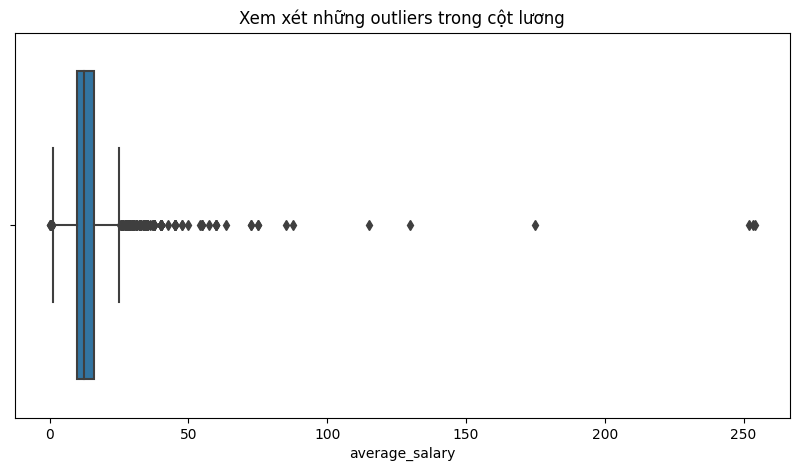

In [15]:
df_encoding['average_salary'] = df['average_salary']
# Vẽ biểu đồ boxplot cho cột lương
plt.figure(figsize=(10, 5))
sns.boxplot(x='average_salary', data=df_encoding)
plt.title('Xem xét những outliers trong cột lương')

In [16]:
# Quá nhiều outliers, ta sẽ loại bỏ những outliers này
df_encoding = df_encoding[df_encoding['average_salary'] < 35]
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6374 entries, 0 to 5063
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   position_level          6374 non-null   int64  
 1   gender_requirement      6374 non-null   int64  
 2   work_type               6374 non-null   int64  
 3   degree_requirement      6374 non-null   int64  
 4   experience_requirement  6374 non-null   int64  
 5   company_size            6374 non-null   int64  
 6   company_type            6374 non-null   int64  
 7   primary_industry        6374 non-null   int64  
 8   related_industry_1      6374 non-null   int64  
 9   related_industry_2      6374 non-null   int64  
 10  recruiting_area         6374 non-null   int64  
 11  probation_period        6374 non-null   float64
 12  min_age                 6374 non-null   float64
 13  max_age                 6374 non-null   float64
 14  average_salary          6374 non-null   

# Xây dựng mô hình

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

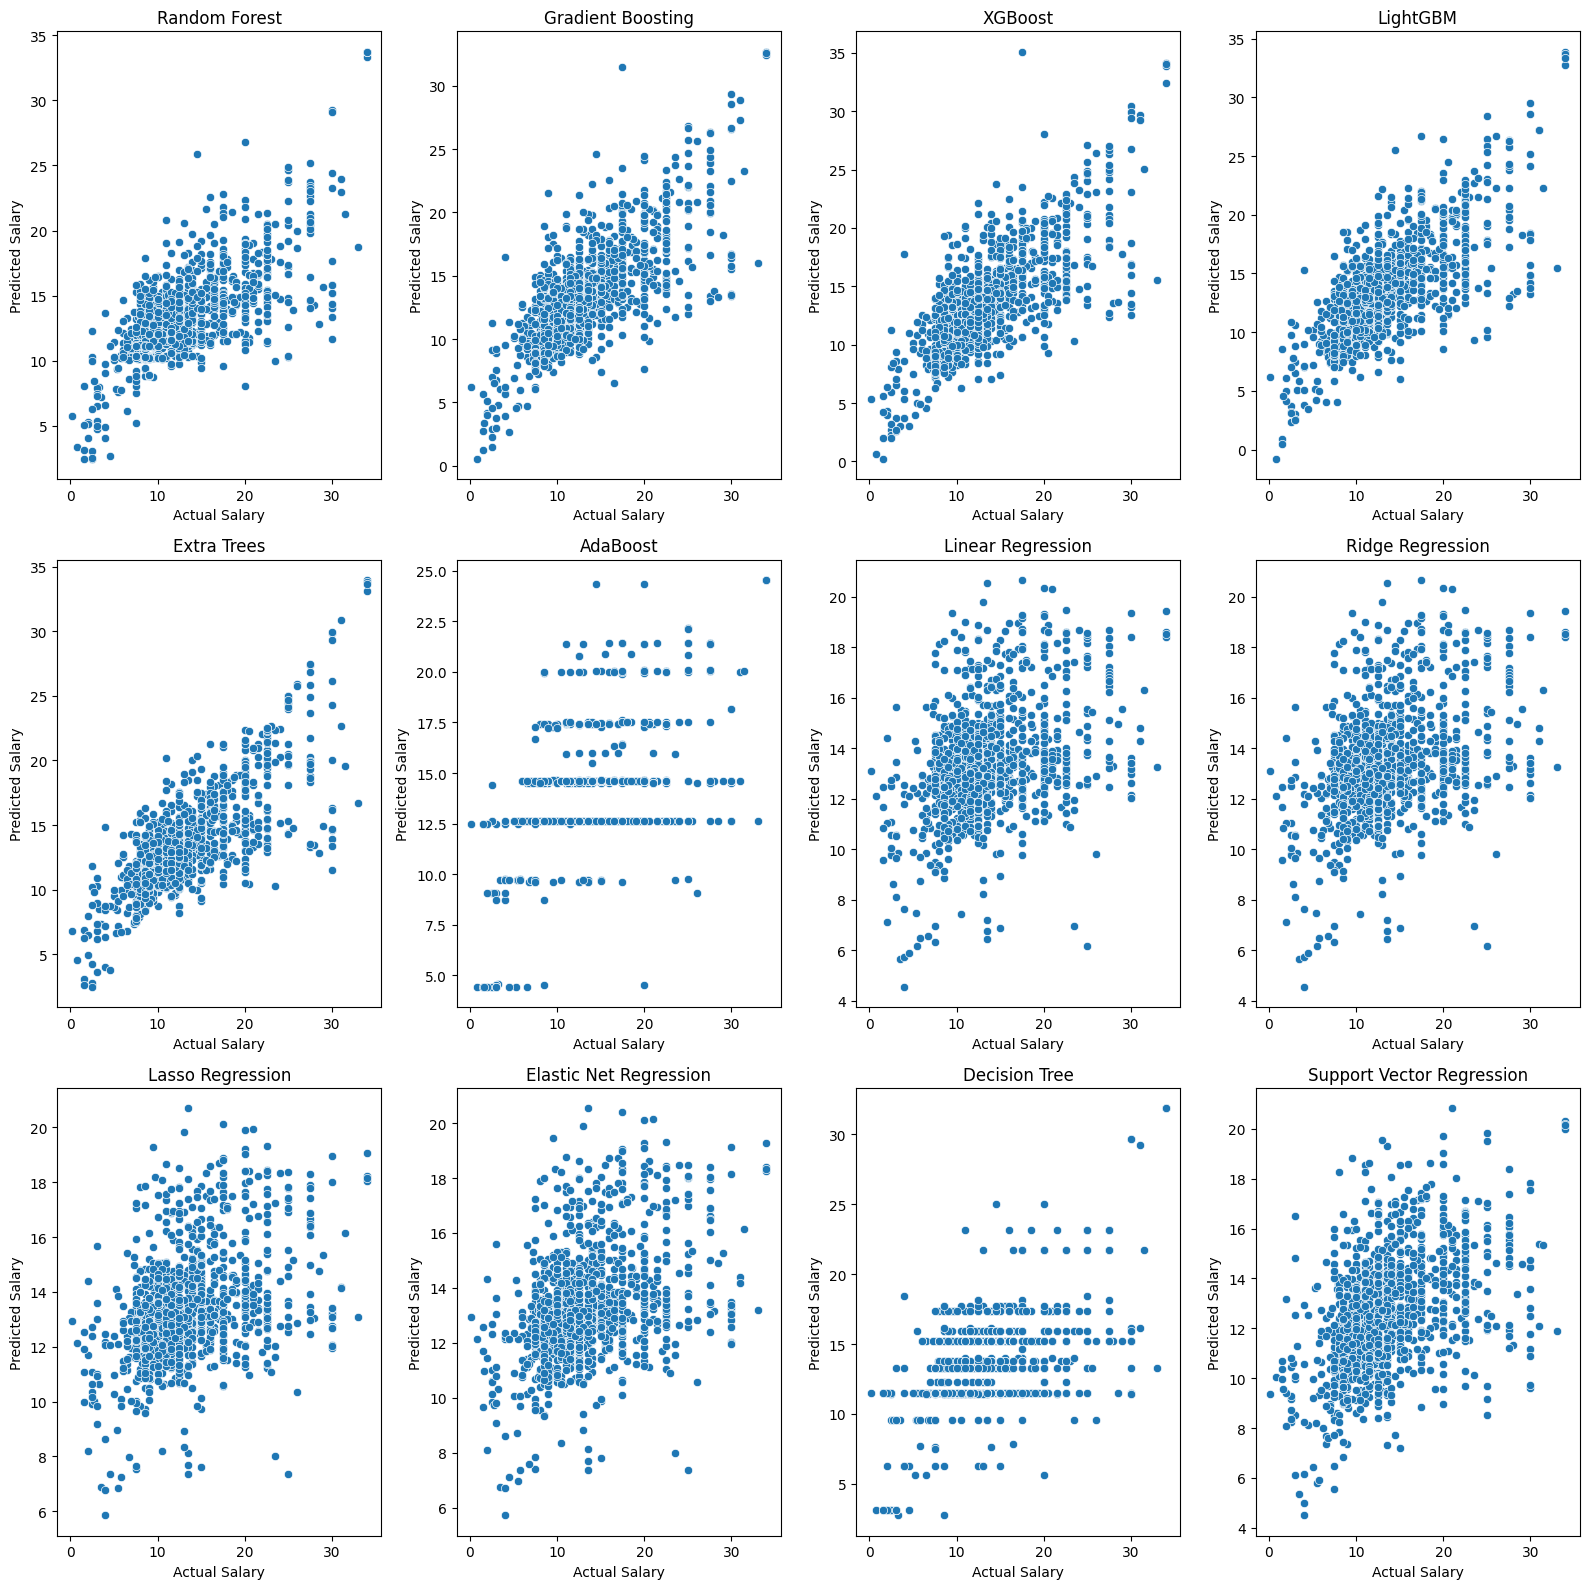

In [17]:
# Chuẩn bị dữ liệu (thay đổi tên cột và đường dẫn dữ liệu tương ứng)
X = df_encoding.drop('average_salary', axis=1)
y = df_encoding['average_salary']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR()
}

# Thiết lập các tham số cần tìm kiếm
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 500],
        'max_features': [1.0, 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'min_data_in_leaf': [20, 30, 40],
        'min_gain_to_split': [0.1, 0.2, 0.3]
    },
    'Extra Trees': {
        'n_estimators': [100, 200, 500],
        'max_features': [1.0, 'sqrt', 'log2']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1]
    },
    'Linear Regression': {
    },
    'Ridge Regression': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'Lasso Regression': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'Elastic Net Regression': {
        'alpha': [0.1, 0.5, 1.0],
        'l1_ratio': [0.1, 0.5, 0.9]
    },
    'Decision Tree': {
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 3, 4]
    },
    'Support Vector Regression': {
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.3]
    },
}

# K-fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search và huấn luyện mô hình
best_models = {}

# Kích thước của ô vẽ
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
axs = axs.flatten()
model_names = []
best_params = []
mses = []
maes =[]
r2s = []


# Grid Search và huấn luyện mô hình

for i, (model_name, model) in enumerate(models.items()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='neg_mean_squared_error', cv=kf)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    predictions = best_models[model_name].predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    model_names.append(model_name)
    best_params.append(grid_search.best_params_)
    mses.append(mse)
    maes.append(mae)
    r2s.append(r2)

    # In thông tin đánh giá mô hình
    print(f"{model_name}:")
    print(f"  Best Parameters: {grid_search.best_params_}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R2: {r2}\n")

    # Vẽ biểu đồ
    sns.scatterplot(x=y_test, y=predictions, ax=axs[i])
    axs[i].set_title(f'{model_name}', fontsize=12)
    axs[i].set_xlabel('Actual Salary')
    axs[i].set_ylabel('Predicted Salary')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()



In [18]:
# Tạo dataframe chứa kết quả đánh giá
evaluation = pd.DataFrame({
    'Model': model_names,
    'Best Parameters': best_params,
    'MSE': mses,
    'MAE': maes,
    'R2': r2s
})
evaluation

,Model,Best Parameters,MSE,MAE,R2
0,Random Forest,"{'max_depth': 8, 'max_features': 1.0, 'n_estim...",15.559252,2.927545,0.473044
1,Gradient Boosting,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",13.120305,2.540337,0.555645
2,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",12.847264,2.484484,0.564892
3,LightGBM,"{'learning_rate': 0.1, 'max_depth': 5, 'min_da...",13.398044,2.558912,0.546239
4,Extra Trees,"{'max_features': 'log2', 'n_estimators': 200}",12.356194,2.342329,0.581524
5,AdaBoost,"{'learning_rate': 0.01, 'n_estimators': 100}",23.155839,3.666204,0.215765
6,Linear Regression,{},25.076606,3.718586,0.150713
7,Ridge Regression,{'alpha': 1.0},25.076711,3.718606,0.150709
8,Lasso Regression,{'alpha': 0.1},25.296516,3.741858,0.143265
9,Elastic Net Regression,"{'alpha': 0.1, 'l1_ratio': 0.1}",25.165393,3.731092,0.147706


In [19]:
import pickle
# Lưu các model về thư mục models
for model_name, model in best_models.items():
    with open(f'../models/{model_name}.pkl', 'wb') as file:
    # with open(f'/content/drive/MyDrive/HCMUS/HK5/Intro2DS/Final Project/models/{model_name}.pkl', 'wb') as file:
        pickle.dump(model, file)
# Lưu các label encoder về thư mục models
for col, le in label_encoders.items():
    with open(f'../models/{col}_label_encoder.pkl', 'wb') as file:
    # with open(f'/content/drive/MyDrive/HCMUS/HK5/Intro2DS/Final Project/models/{col}_label_encoder.pkl', 'wb') as file:
        pickle.dump(le, file)